In [240]:
import pandas as pd
import matplotlib.pyplot as plt
import sidetable as stb
import numpy as np

In [184]:
df1 = pd.read_csv('../data/books_25_pages.csv',skipinitialspace=True)
df1 = df1.rename(columns = lambda x: x.strip())
df1.head()

,book_reference,author_names,avg_rating,num_ratings,year_published,book_title,book_isbn,book_review_count,kindle_price,genre_20th-century,...,genre_unfinished,genre_urban-planning,genre_vegan,genre_war,genre_womens,genre_womens-studies,genre_world-war-ii,genre_writing,genre_young-adult,genre_zen
0,/book/show/28257707-the-subtle-art-of-not-givi...,Mark Manson,3.94,515636,2016.0,The Subtle Art of Not Giving a F*ck,NaN,33082.0,NaN,0,...,126,0,0,0,0,0,0,0,0,0
1,/book/show/4865.How_to_Win_Friends_and_Influen...,Dale Carnegie,4.20,600309,1936.0,How to Win Friends and Influence People,NaN,15121.0,NaN,0,...,0,0,0,0,0,0,0,0,0,0
2,/book/show/36072.The_7_Habits_of_Highly_Effect...,Stephen R. Covey,4.12,517025,1989.0,The 7 Habits of Highly Effective People,9.780743e+12,10277.0,NaN,0,...,0,0,0,0,0,0,0,0,0,0
3,/book/show/12609433-the-power-of-habit,Charles Duhigg,4.10,337512,2012.0,The Power of Habit,9.781400e+12,16950.0,NaN,0,...,0,0,0,0,0,0,0,0,0,0
4,/book/show/22318578-the-life-changing-magic-of...,Marie Kond\xc5\x8d,3.84,275462,2011.0,The Life-Changing Magic of Tidying Up,9.781608e+12,27998.0,9.99,0,...,0,0,0,0,0,0,0,0,0,0


In [185]:
#[print(i) for i in df1.columns]

In [186]:
#drop the column genre_unfinished and book_isbn
df2 = df1.drop(columns=['genre_unfinished','book_isbn'])
df2.head()

,book_reference,author_names,avg_rating,num_ratings,year_published,book_title,book_review_count,kindle_price,genre_20th-century,genre_21st-century,...,genre_true-crime,genre_urban-planning,genre_vegan,genre_war,genre_womens,genre_womens-studies,genre_world-war-ii,genre_writing,genre_young-adult,genre_zen
0,/book/show/28257707-the-subtle-art-of-not-givi...,Mark Manson,3.94,515636,2016.0,The Subtle Art of Not Giving a F*ck,33082.0,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
1,/book/show/4865.How_to_Win_Friends_and_Influen...,Dale Carnegie,4.20,600309,1936.0,How to Win Friends and Influence People,15121.0,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
2,/book/show/36072.The_7_Habits_of_Highly_Effect...,Stephen R. Covey,4.12,517025,1989.0,The 7 Habits of Highly Effective People,10277.0,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
3,/book/show/12609433-the-power-of-habit,Charles Duhigg,4.10,337512,2012.0,The Power of Habit,16950.0,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
4,/book/show/22318578-the-life-changing-magic-of...,Marie Kond\xc5\x8d,3.84,275462,2011.0,The Life-Changing Magic of Tidying Up,27998.0,9.99,0,0,...,0,0,0,0,0,0,0,0,0,0


In [187]:
# check NaN values
df2.loc[:,'book_reference':'kindle_price'].stb.missing()

,missing,total,percent
kindle_price,653,1249,52.281825
year_published,16,1249,1.281025
book_title,6,1249,0.480384
book_review_count,6,1249,0.480384
book_reference,0,1249,0.000000
author_names,0,1249,0.000000
avg_rating,0,1249,0.000000
num_ratings,0,1249,0.000000


In [188]:
# drop rows where kindle_price or book_review_count or year_pubished are NaN because they are important values
df3 = df2.dropna()
len(df3.index)

590

count    590.000000
mean      10.009169
std        4.314931
min        0.000000
25%        8.002500
50%        9.990000
75%       12.990000
max       39.990000
Name: kindle_price, dtype: float64

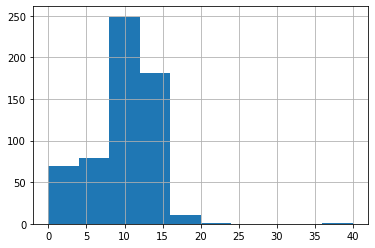

In [189]:
# explore kindle_price
df3['kindle_price'].hist()
df3['kindle_price'].describe()

In [190]:
# drop books with price zero because they actually have greater price #TODO
df4 = df3[df3['kindle_price']>0]
len(df4.index)

556

count    556.000000
mean      10.621241
std        3.639582
min        0.990000
25%        8.990000
50%       10.870000
75%       12.990000
max       39.990000
Name: kindle_price, dtype: float64

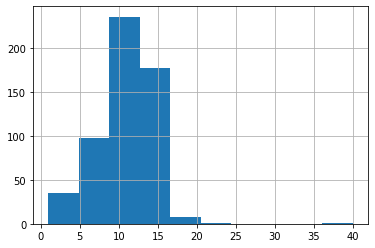

In [191]:
# explore kindle_price
df4['kindle_price'].hist()
df4['kindle_price'].describe()

count      556.000000
mean      1391.476619
std       3115.211058
min         26.000000
25%        236.750000
50%        496.000000
75%       1127.000000
max      33024.000000
Name: book_review_count, dtype: float64

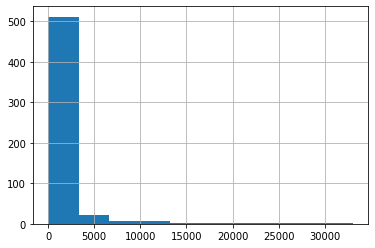

In [192]:
# explore book_review_count
df4['book_review_count'].hist()
df4['book_review_count'].describe()

count       556.000000
mean      22463.143885
std       66607.614149
min         562.000000
25%        2735.750000
50%        5888.500000
75%       15848.250000
max      945306.000000
Name: num_ratings, dtype: float64

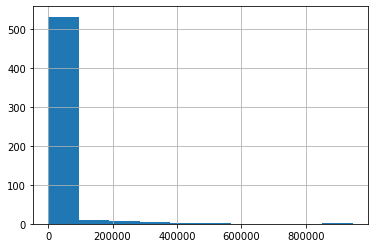

In [193]:
# explore num_ratings
df4['num_ratings'].hist()
df4['num_ratings'].describe()

In [194]:
df4.head()

,book_reference,author_names,avg_rating,num_ratings,year_published,book_title,book_review_count,kindle_price,genre_20th-century,genre_21st-century,...,genre_true-crime,genre_urban-planning,genre_vegan,genre_war,genre_womens,genre_womens-studies,genre_world-war-ii,genre_writing,genre_young-adult,genre_zen
4,/book/show/22318578-the-life-changing-magic-of...,Marie Kond\xc5\x8d,3.84,275462,2011.0,The Life-Changing Magic of Tidying Up,27998.0,9.99,0,0,...,0,0,0,0,0,0,0,0,0,0
7,/book/show/8520610-quiet,Susan Cain,4.06,319847,2012.0,Quiet,23496.0,9.99,0,0,...,0,0,0,0,0,0,0,0,0,0
9,/book/show/6708.The_Power_of_Now,Eckhart Tolle,4.13,206222,1997.0,The Power of Now,9437.0,8.48,0,0,...,0,0,0,0,0,0,0,0,0,0
12,/book/show/23878688-the-5-love-languages,Gary Chapman,4.25,293246,1990.0,The 5 Love Languages,11904.0,8.54,0,0,...,0,0,0,0,0,0,0,0,0,0
15,/book/show/52529.The_Secret,Rhonda Byrne,3.68,344937,2006.0,"The Secret (The Secret, #1)",12429.0,11.99,0,0,...,0,0,0,0,0,0,0,0,0,0


In [195]:
# sum the genres
df_percent_genre = df4.copy()
df_percent_genre['sum_genres'] = df4[df4.columns[8::]].sum(axis=1)
df_percent_genre.head()

,book_reference,author_names,avg_rating,num_ratings,year_published,book_title,book_review_count,kindle_price,genre_20th-century,genre_21st-century,...,genre_urban-planning,genre_vegan,genre_war,genre_womens,genre_womens-studies,genre_world-war-ii,genre_writing,genre_young-adult,genre_zen,sum_genres
4,/book/show/22318578-the-life-changing-magic-of...,Marie Kond\xc5\x8d,3.84,275462,2011.0,The Life-Changing Magic of Tidying Up,27998.0,9.99,0,0,...,0,0,0,0,0,0,0,0,0,12536
7,/book/show/8520610-quiet,Susan Cain,4.06,319847,2012.0,Quiet,23496.0,9.99,0,0,...,0,0,0,0,0,0,0,0,0,21523
9,/book/show/6708.The_Power_of_Now,Eckhart Tolle,4.13,206222,1997.0,The Power of Now,9437.0,8.48,0,0,...,0,0,0,0,0,0,0,0,0,7532
12,/book/show/23878688-the-5-love-languages,Gary Chapman,4.25,293246,1990.0,The 5 Love Languages,11904.0,8.54,0,0,...,0,0,0,0,0,0,0,0,0,8449
15,/book/show/52529.The_Secret,Rhonda Byrne,3.68,344937,2006.0,"The Secret (The Secret, #1)",12429.0,11.99,0,0,...,0,0,0,0,0,0,0,0,0,4864


In [196]:
df_percent_genre['sum_genres'].describe()

count      556.000000
mean      1287.467626
std       2395.614676
min        102.000000
25%        294.000000
50%        526.500000
75%       1271.500000
max      22670.000000
Name: sum_genres, dtype: float64

In [197]:
# create genres percentage columns
columns_genre = list(df4.columns[8::])
for columni in columns_genre:
    df_percent_genre[columni+'_percent'] = df_percent_genre.apply(lambda x : x[columni]/x['sum_genres'],axis=1)
df_percent_genre.head()

,book_reference,author_names,avg_rating,num_ratings,year_published,book_title,book_review_count,kindle_price,genre_20th-century,genre_21st-century,...,genre_true-crime_percent,genre_urban-planning_percent,genre_vegan_percent,genre_war_percent,genre_womens_percent,genre_womens-studies_percent,genre_world-war-ii_percent,genre_writing_percent,genre_young-adult_percent,genre_zen_percent
4,/book/show/22318578-the-life-changing-magic-of...,Marie Kond\xc5\x8d,3.84,275462,2011.0,The Life-Changing Magic of Tidying Up,27998.0,9.99,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,/book/show/8520610-quiet,Susan Cain,4.06,319847,2012.0,Quiet,23496.0,9.99,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,/book/show/6708.The_Power_of_Now,Eckhart Tolle,4.13,206222,1997.0,The Power of Now,9437.0,8.48,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,/book/show/23878688-the-5-love-languages,Gary Chapman,4.25,293246,1990.0,The 5 Love Languages,11904.0,8.54,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,/book/show/52529.The_Secret,Rhonda Byrne,3.68,344937,2006.0,"The Secret (The Secret, #1)",12429.0,11.99,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [226]:
# create column for normalized num_ratings and review_count by years since published
# use only books from previous 2019 or older
df_out = df_percent_genre[df_percent_genre['year_published']<2020]
df_out['ratings_per_month_since_published'] = df_out.apply(lambda x : x['num_ratings']/(12*(2020-x['year_published'])),axis=1)
df_out['reviews_per_month_since_published'] = df_out.apply(lambda x : x['book_review_count']/(12*(2020-x['year_published'])),axis=1)
df_out.head()

C:\Users\valer\anaconda3\envs\insight\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\valer\anaconda3\envs\insight\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,book_reference,author_names,avg_rating,num_ratings,year_published,book_title,book_review_count,kindle_price,genre_20th-century,genre_21st-century,...,genre_vegan_percent,genre_war_percent,genre_womens_percent,genre_womens-studies_percent,genre_world-war-ii_percent,genre_writing_percent,genre_young-adult_percent,genre_zen_percent,ratings_per_month_since_published,reviews_per_month_since_published
4,/book/show/22318578-the-life-changing-magic-of...,Marie Kond\xc5\x8d,3.84,275462,2011.0,The Life-Changing Magic of Tidying Up,27998.0,9.99,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2550.574074,259.240741
7,/book/show/8520610-quiet,Susan Cain,4.06,319847,2012.0,Quiet,23496.0,9.99,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3331.739583,244.750000
9,/book/show/6708.The_Power_of_Now,Eckhart Tolle,4.13,206222,1997.0,The Power of Now,9437.0,8.48,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,747.181159,34.192029
12,/book/show/23878688-the-5-love-languages,Gary Chapman,4.25,293246,1990.0,The 5 Love Languages,11904.0,8.54,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,814.572222,33.066667
15,/book/show/52529.The_Secret,Rhonda Byrne,3.68,344937,2006.0,"The Secret (The Secret, #1)",12429.0,11.99,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2053.196429,73.982143


count    380.000000
mean       3.287370
std        2.738205
min        0.083333
25%        0.986458
50%        2.431362
75%        4.820833
max        9.992424
Name: reviews_per_month_since_published, dtype: float64

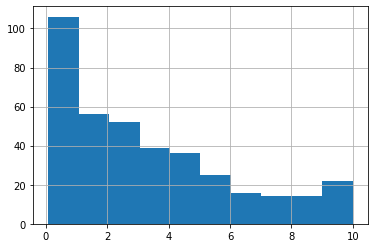

In [230]:
df_out[df_out['reviews_per_month_since_published']<10]['reviews_per_month_since_published'].hist()
df_out[df_out['reviews_per_month_since_published']<10]['reviews_per_month_since_published'].describe()

In [231]:
df_out = df_out[df_out['reviews_per_month_since_published']<10]

In [270]:
means = []
colnames_small = []
count = 0
for i in df_out.columns:
    if not "percent" in i: continue
    try:
        means.append(df_out[i].mean())
        if df_out[i].mean() < 1e-03: 
            count += 1
            colnames_small.append(i)
    except:
        continue
print(len(means),count,count/len(means), np.median(means),np.mean(means),np.min(means),np.max(means))

243 195 0.8024691358024691 6.835269993164731e-05 0.004115226337448559 0.0 0.2524575507064876


Note that 40% of the features are genres are less than the the 1e-5, and the median is 6e-5. Let's clean the data more

In [271]:
df_out2 = df_out.drop(colnames_small,axis=1)
print(len(df_out2.index),len(df_out2.columns))

380 302


In [272]:
df_out2.to_csv('../data/books_25_pages_clean0.csv',index=False)